# EEL891 - 2024.2 - Trabalho 1
### Classificador de aprovação de crédito
*Aluno:* Miguel Badany Cerne<br>*DRE:* 123370433<br>*Usuário Kaggle:* miguelbadanycerne<br>*ID Kaggle:* 20164449
<hr>

# 1. Baixar e Importar as Bibliotecas

In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer, MinMaxScaler

# 2. Criação da Tabela e Exploração do Dataset
Aqui criamos o dataframe do pandas e começamos a interagir com ele com o intuito de entender melhor sobre nosso conjunto de dados.

In [ ]:
df = pd.read_csv('conjunto_de_treinamento.csv')
df # mostra o preview do dataset

,id_solicitante,produto_solicitado,dia_vencimento,forma_envio_solicitacao,tipo_endereco,sexo,idade,estado_civil,qtde_dependentes,grau_instrucao,...,possui_telefone_trabalho,codigo_area_telefone_trabalho,meses_no_trabalho,profissao,ocupacao,profissao_companheiro,grau_instrucao_companheiro,local_onde_reside,local_onde_trabalha,inadimplente
0,1,1,10,presencial,1,M,85,2,0,0,...,N,,0,9.0,1.0,0.0,0.0,600.0,600.0,0
1,2,1,25,internet,1,F,38,1,0,0,...,N,,0,2.0,5.0,NaN,NaN,492.0,492.0,0
2,3,1,20,internet,1,F,37,2,0,0,...,N,,0,NaN,NaN,NaN,NaN,450.0,450.0,1
3,4,1,20,internet,1,M,37,1,1,0,...,Y,54,0,9.0,2.0,NaN,NaN,932.0,932.0,1
4,5,7,1,internet,1,F,51,1,3,0,...,N,,0,9.0,5.0,NaN,NaN,440.0,440.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1,10,presencial,1,M,27,2,0,0,...,N,,0,9.0,1.0,0.0,0.0,308.0,308.0,0
19996,19997,1,20,presencial,1,F,26,2,1,0,...,N,,0,9.0,2.0,0.0,0.0,639.0,639.0,0
19997,19998,1,10,internet,1,F,63,2,0,0,...,N,,0,9.0,1.0,NaN,NaN,486.0,486.0,0
19998,19999,1,5,internet,1,F,84,1,0,0,...,N,,0,NaN,NaN,NaN,NaN,590.0,590.0,0


In [124]:
df_teste = pd.read_csv('conjunto_de_teste.csv') # Será usado no final para testar o modelo.

Notamos que alguns valores não são numéricos e alguns valores também não estão preenchidos (NaN), fatores que deveremos consertar após a exploração do dataset.

In [62]:
df.head().T

,0,1,2,3,4
id_solicitante,1,2,3,4,5
produto_solicitado,1,1,1,1,7
dia_vencimento,10,25,20,20,1
forma_envio_solicitacao,presencial,internet,internet,internet,internet
tipo_endereco,1,1,1,1,1
sexo,M,F,F,M,F
idade,85,38,37,37,51
estado_civil,2,1,2,1,1
qtde_dependentes,0,0,0,1,3
grau_instrucao,0,0,0,0,0


## 2.1. Checar se o conjunto é balanceado
Vamos checar se o conjunto de dados é balanceado quanto ao número de fraudes e compras legítimas. 

In [63]:
df['inadimplente'].value_counts() # mostra a quantidade de inadimplentes e adimplentes

inadimplente
0    10000
1    10000
Name: count, dtype: int64

Notamos que sim, há a mesma quantidade de transações verídicas e falsas, o que em um problema real de classificação de crédito provavelmente não seria o caso, haja vista que o número de compras verdadeiras é provavelmente muito superior ao de compras falsas. Mas sendo assim, poodemos supor que o dataset é balanceado.

## 2.2. Visualizar o Conjunto com df.hist()

array([[<Axes: title={'center': 'id_solicitante'}>,
        <Axes: title={'center': 'produto_solicitado'}>,
        <Axes: title={'center': 'dia_vencimento'}>,
        <Axes: title={'center': 'tipo_endereco'}>,
        <Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'estado_civil'}>],
       [<Axes: title={'center': 'qtde_dependentes'}>,
        <Axes: title={'center': 'grau_instrucao'}>,
        <Axes: title={'center': 'nacionalidade'}>,
        <Axes: title={'center': 'tipo_residencia'}>,
        <Axes: title={'center': 'meses_na_residencia'}>,
        <Axes: title={'center': 'possui_email'}>],
       [<Axes: title={'center': 'renda_mensal_regular'}>,
        <Axes: title={'center': 'renda_extra'}>,
        <Axes: title={'center': 'possui_cartao_visa'}>,
        <Axes: title={'center': 'possui_cartao_mastercard'}>,
        <Axes: title={'center': 'possui_cartao_diners'}>,
        <Axes: title={'center': 'possui_cartao_amex'}>],
       [<Axes: title={'center': 'poss

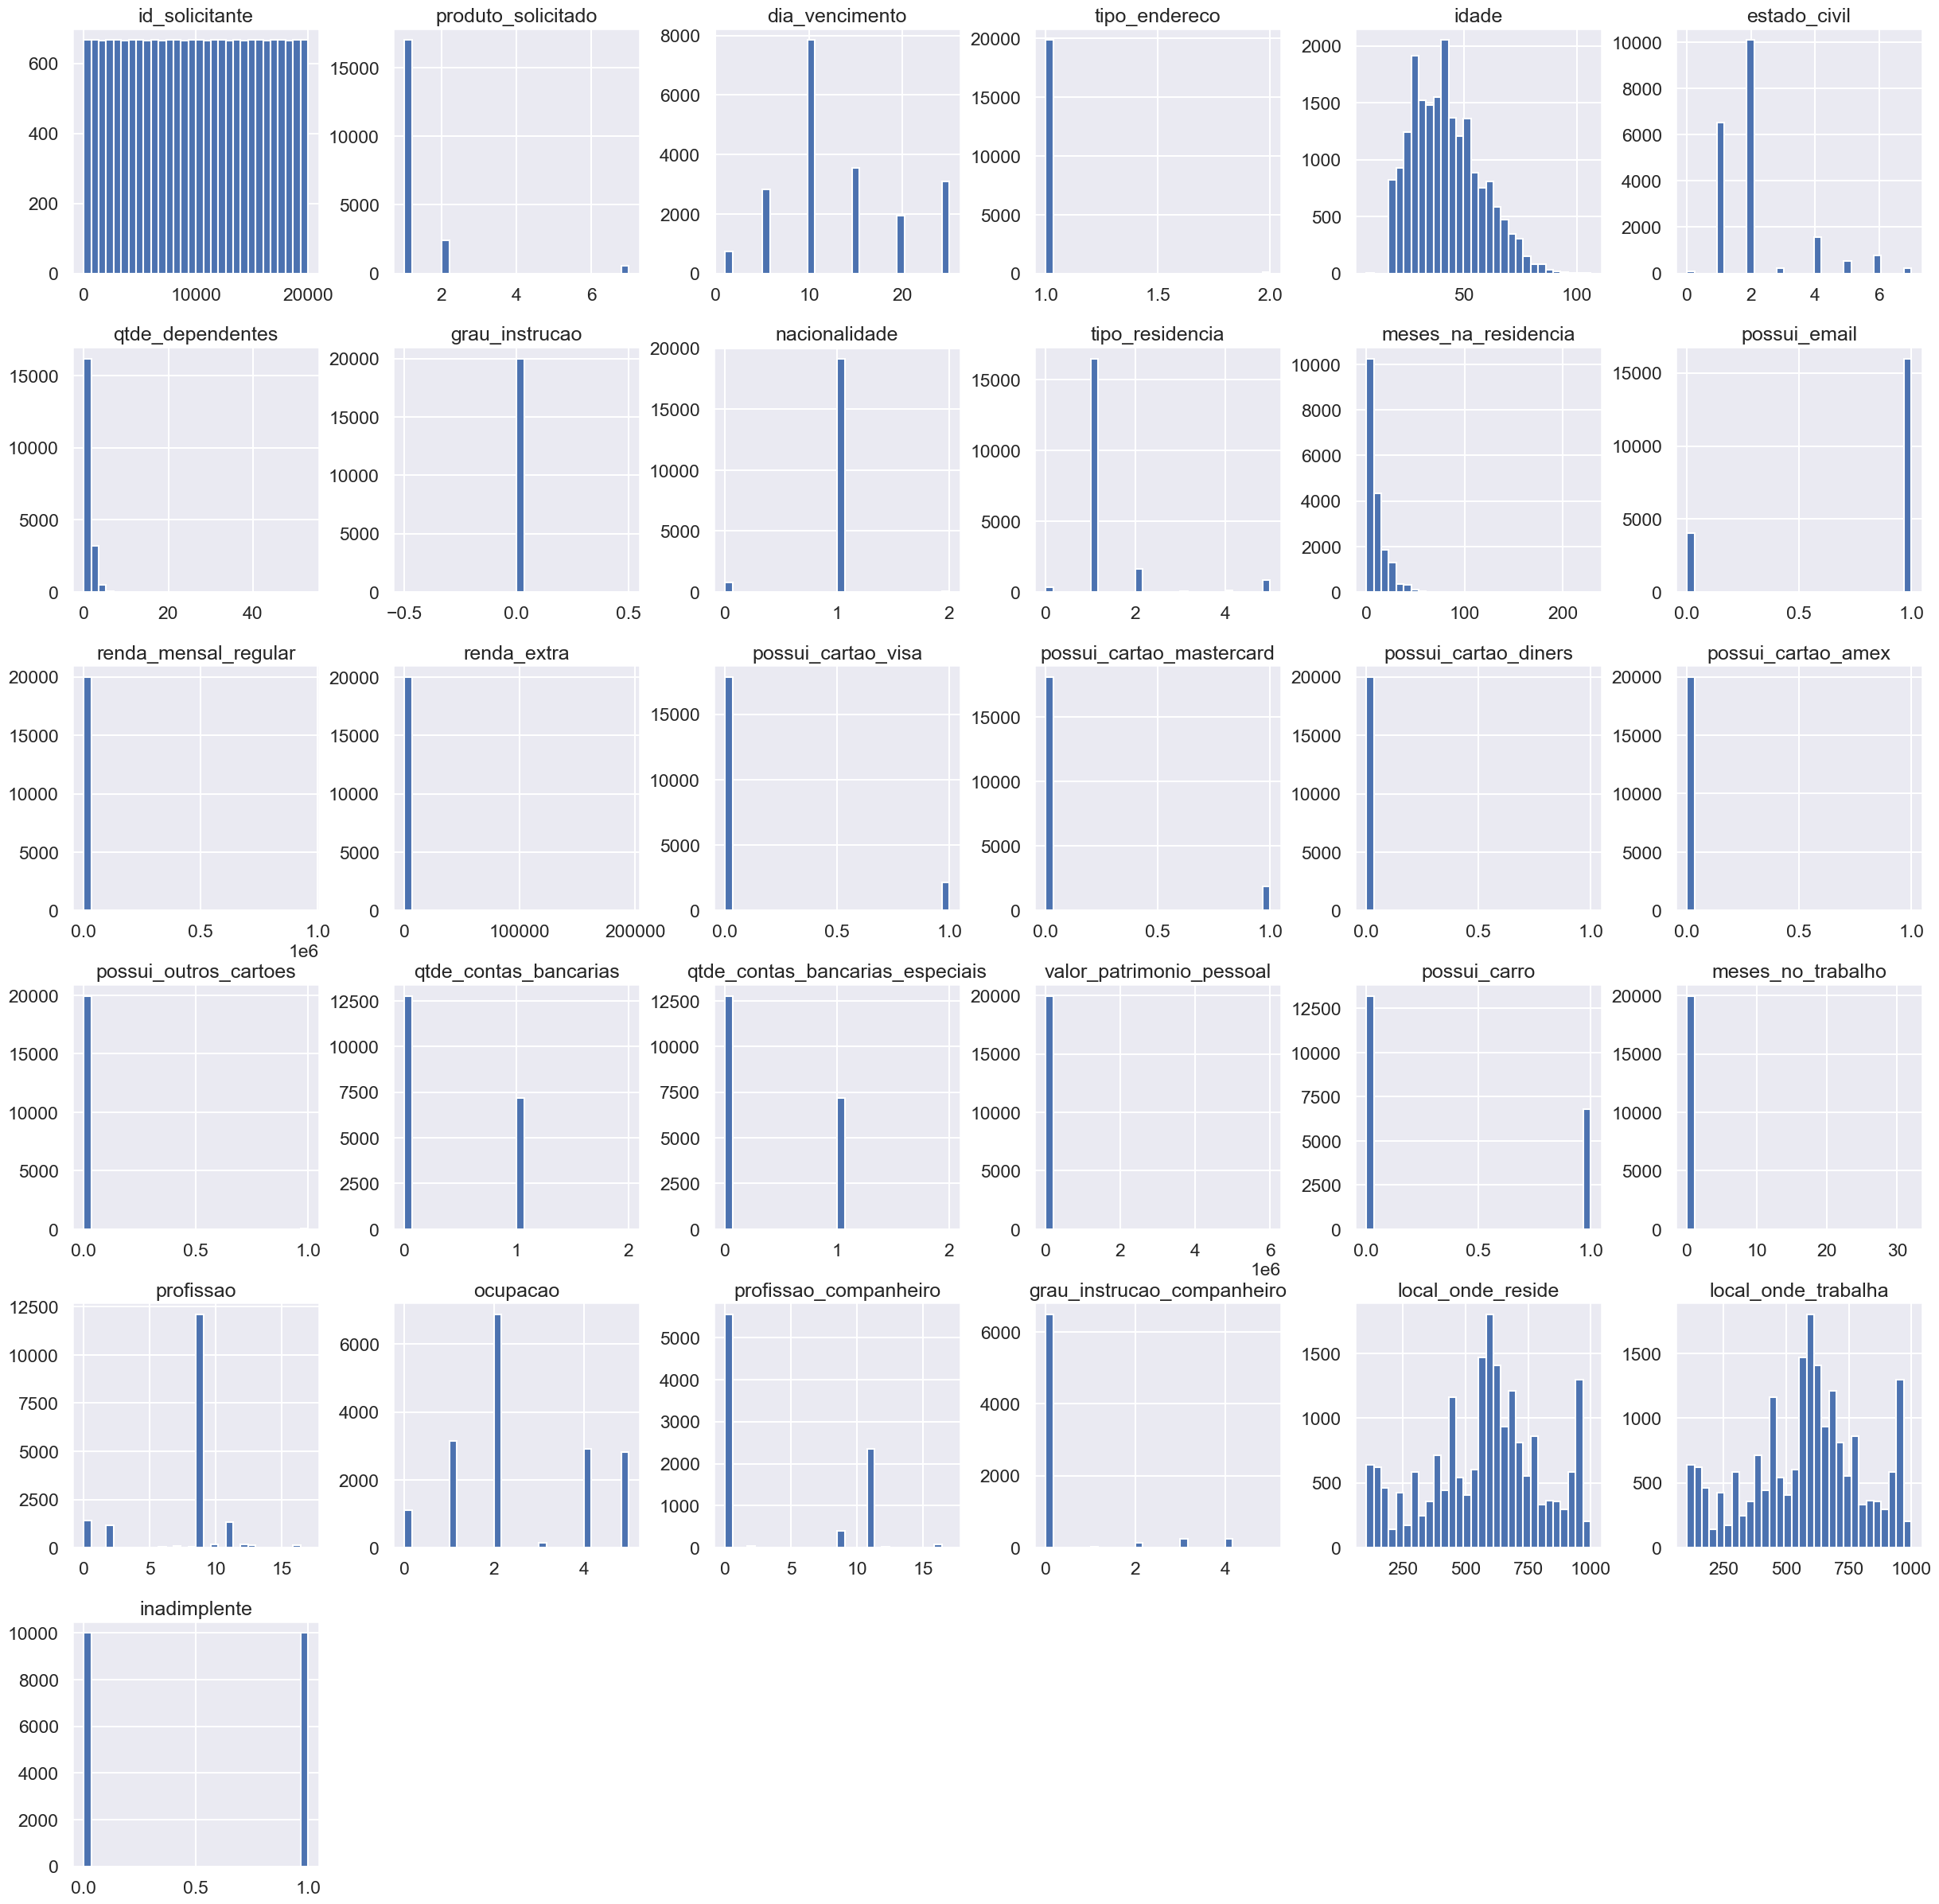

In [64]:
df.hist(bins=30, figsize=(30,30))

Notamos então que muitas colunas não estão normalizadas e precisaremos normalizá-las posteriormente para melhorar o desempenho do nosso modelo.

## 2.3. Visualizar a descrição do conjunto de dados

In [65]:
df.describe()

,id_solicitante,produto_solicitado,dia_vencimento,tipo_endereco,idade,estado_civil,qtde_dependentes,grau_instrucao,nacionalidade,tipo_residencia,...,valor_patrimonio_pessoal,possui_carro,meses_no_trabalho,profissao,ocupacao,profissao_companheiro,grau_instrucao_companheiro,local_onde_reside,local_onde_trabalha,inadimplente
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,19464.000000,...,2.000000e+04,20000.000000,20000.000000,16903.000000,17022.000000,8486.000000,7140.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,1.284350,13.147250,1.006350,42.352500,2.120850,0.666400,0.0,0.961600,1.261303,...,2.095614e+03,0.339050,0.008900,8.045081,2.533310,3.708107,0.288095,581.295250,581.295250,0.500000
std,5773.647028,1.008239,6.748507,0.079435,14.930177,1.332004,1.236725,0.0,0.202305,0.883580,...,4.403344e+04,0.473399,0.388881,3.210790,1.532765,5.181241,0.944339,227.369798,227.369798,0.500013
min,1.000000,1.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,105.000000,0.000000
25%,5000.750000,1.000000,10.000000,1.000000,31.000000,1.000000,0.000000,0.0,1.000000,1.000000,...,0.000000e+00,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,444.000000,444.000000,0.000000
50%,10000.500000,1.000000,10.000000,1.000000,40.000000,2.000000,0.000000,0.0,1.000000,1.000000,...,0.000000e+00,0.000000,0.000000,9.000000,2.000000,0.000000,0.000000,596.000000,596.000000,0.500000
75%,15000.250000,1.000000,20.000000,1.000000,52.000000,2.000000,1.000000,0.0,1.000000,1.000000,...,0.000000e+00,1.000000,0.000000,9.000000,4.000000,11.000000,0.000000,728.000000,728.000000,1.000000
max,20000.000000,7.000000,25.000000,2.000000,106.000000,7.000000,53.000000,0.0,2.000000,5.000000,...,6.000000e+06,1.000000,32.000000,17.000000,5.000000,17.000000,5.000000,999.000000,999.000000,1.000000


## 2.4. Matriz de Correlação
Para determinarmos se alguma feature tem pouco grau de correlação com as outras, utilizamos esta matriz. Assim, facilitamos nosso processo de engenharia de features.

<Axes: >

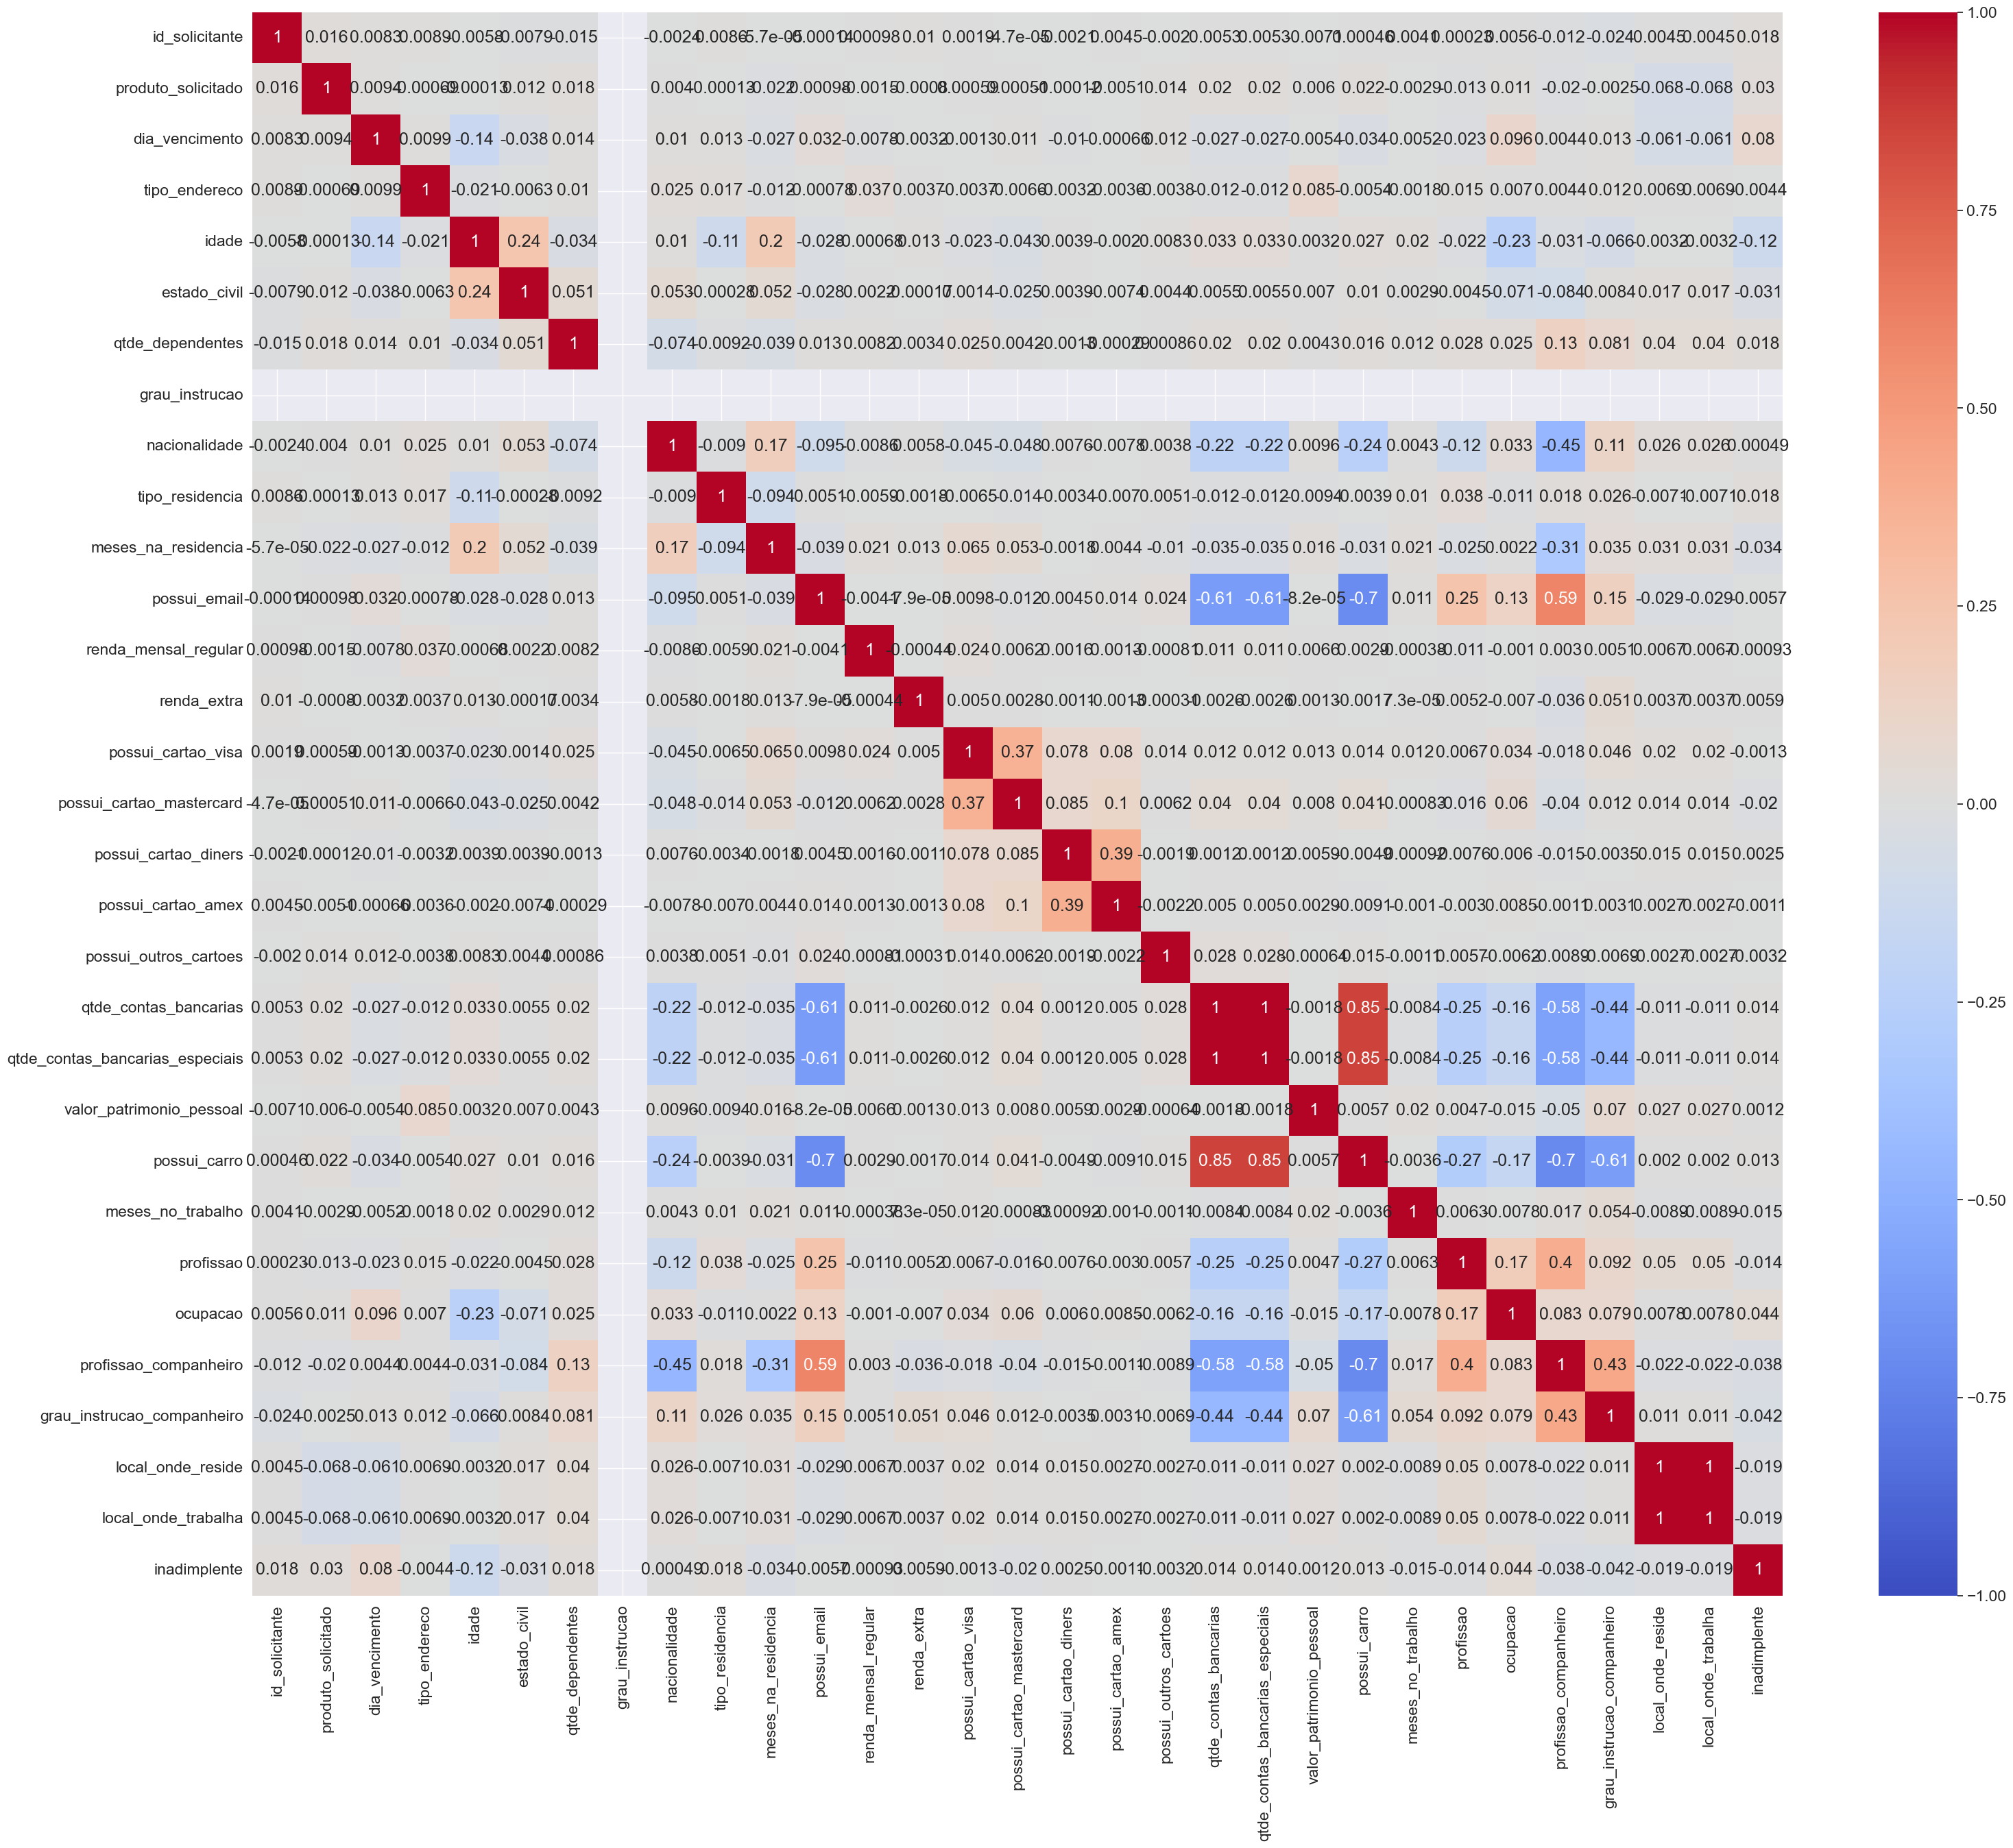

In [ ]:
sns.set_theme(rc={'figure.figsize':(36,30)})
sns.set_context(context='notebook', font_scale=1.5)
df_numerico = df.select_dtypes(include=[np.number])
matriz_correlacao = df_numerico.corr()
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm',vmin=-1, vmax=1)

Com essa matriz, notamos que a coluna de `grau_instrucao` não tem dados suficientes ou interage com outras métricas, logo podemos desconsiderá-lo. Além disso, podemos ver outras interações que serão apronfundadas no momento de limpeza e engenharia de features.

### 2.4.1. Análise de dados vazios

codigo_area_telefone_trabalho       72.625
estado_onde_trabalha                67.865
grau_instrucao_companheiro          64.300
profissao_companheiro               57.570
codigo_area_telefone_residencial    17.670
profissao                           15.485
ocupacao                            14.890
meses_na_residencia                  7.250
estado_onde_nasceu                   4.110
tipo_residencia                      2.680
sexo                                 0.035
dtype: float64

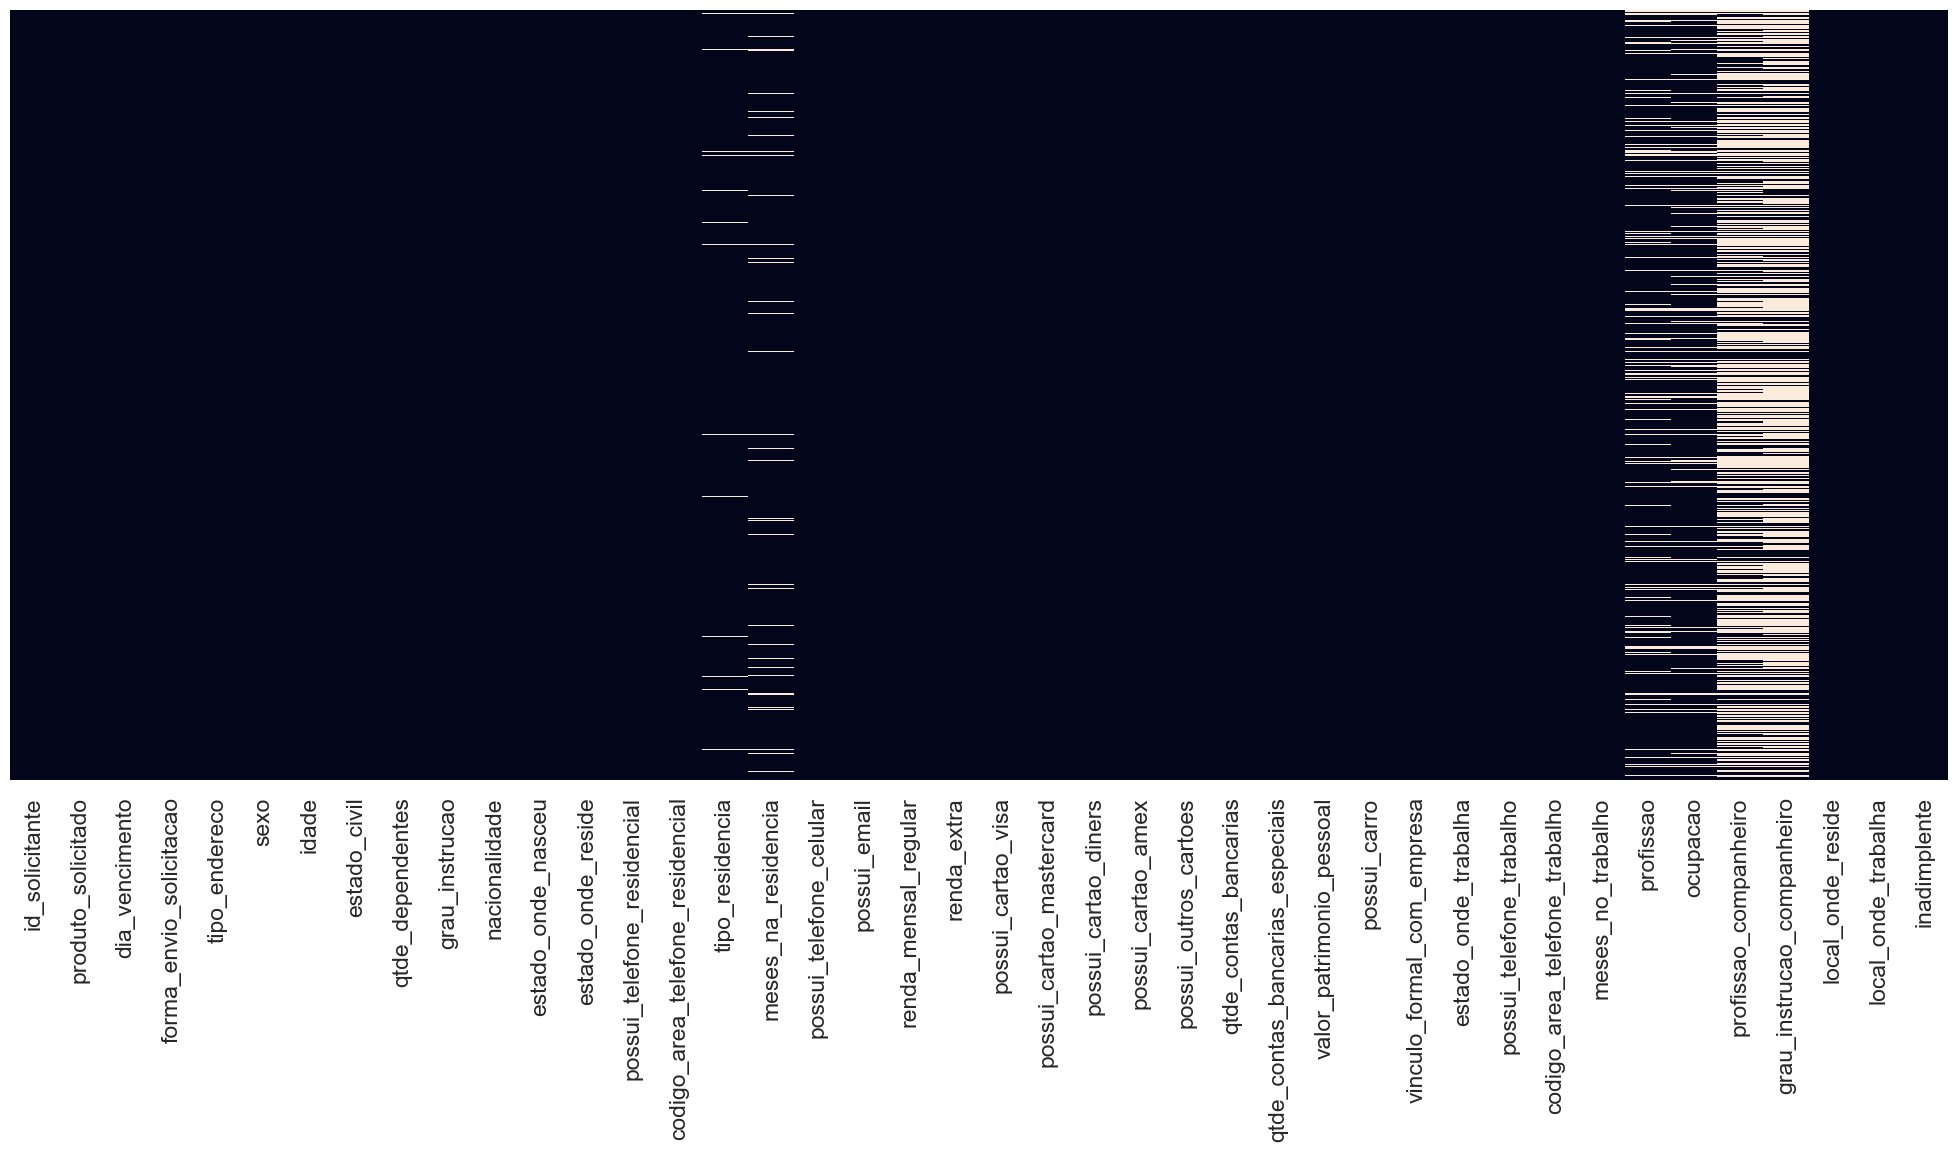

In [67]:
plt.figure(figsize=(25,10))
sns.set_context('talk')

hm = sns.heatmap(df.isnull(), yticklabels=False,cbar=False)
hm.set_yticklabels(labels=hm.get_yticklabels(), va='center')

df = df.replace(" ", np.nan)
nulos = df.isna().sum()

nulos = nulos[nulos > 0]

num_linhas = df.shape[0]
percentual_nulos = nulos.apply(lambda x:(x/num_linhas)*100)
decres_percentual_nulos = pd.Series(percentual_nulos).sort_values(ascending=False)
decres_percentual_nulos

## 2.5. Tipos das Variáveis

In [68]:
df.dtypes

id_solicitante                        int64
produto_solicitado                    int64
dia_vencimento                        int64
forma_envio_solicitacao              object
tipo_endereco                         int64
sexo                                 object
idade                                 int64
estado_civil                          int64
qtde_dependentes                      int64
grau_instrucao                        int64
nacionalidade                         int64
estado_onde_nasceu                   object
estado_onde_reside                   object
possui_telefone_residencial          object
codigo_area_telefone_residencial     object
tipo_residencia                     float64
meses_na_residencia                 float64
possui_telefone_celular              object
possui_email                          int64
renda_mensal_regular                float64
renda_extra                         float64
possui_cartao_visa                    int64
possui_cartao_mastercard        

### 2.5.1. Identificando variáveis categóricas:

In [ ]:
var_categoricas = [
    x for x in df.columns if df[x].dtype == 'object'
]
var_categoricas

['forma_envio_solicitacao',
 'sexo',
 'estado_onde_nasceu',
 'estado_onde_reside',
 'possui_telefone_residencial',
 'codigo_area_telefone_residencial',
 'possui_telefone_celular',
 'vinculo_formal_com_empresa',
 'estado_onde_trabalha',
 'possui_telefone_trabalho',
 'codigo_area_telefone_trabalho']

Verificando a Cardinalidade das Variáveis Categóricas

In [70]:
for v in var_categoricas:
  print("\n%15s:"%v, "%4d categorias" % len(df[v].unique()))
  print(df[v].unique())


forma_envio_solicitacao:    3 categorias
['presencial' 'internet' 'correio']

           sexo:    4 categorias
['M' 'F' 'N' nan]

estado_onde_nasceu:   28 categorias
['CE' 'SE' 'BA' 'RS' 'SP' 'ES' 'GO' 'PR' 'AC' 'PE' nan 'MA' 'MG' 'MT' 'RN'
 'PA' 'SC' 'PI' 'RR' 'RJ' 'AL' 'AM' 'DF' 'MS' 'PB' 'TO' 'AP' 'RO']

estado_onde_reside:   27 categorias
['CE' 'SE' 'BA' 'RS' 'SP' 'ES' 'GO' 'MG' 'AC' 'PE' 'PR' 'PB' 'MA' 'RJ'
 'MT' 'RN' 'PA' 'SC' 'PI' 'AP' 'RR' 'RO' 'AL' 'MS' 'AM' 'DF' 'TO']

possui_telefone_residencial:    2 categorias
['Y' 'N']

codigo_area_telefone_residencial:   81 categorias
['107' '91' '90' '54' '86' '16' '25' '67' nan '81' '10' '58' '32' '76'
 '97' '40' '5' '9' '14' '84' '103' '20' '112' '111' '117' '48' '29' '114'
 '122' '77' '71' '100' '85' '105' '50' '44' '33' '118' '66' '125' '22'
 '120' '12' '38' '62' '18' '73' '27' '41' '39' '126' '75' '30' '68' '61'
 '69' '15' '123' '46' '110' '24' '31' '119' '52' '13' '109' '43' '47' '95'
 '83' '124' '70' '2' '17' '1' '113' '36' '6' 

*Conclusões:*
- forma_envio_solicitacao: não-ordinal (3 categorias) -> one-hot encoding
- sexo: não-ordinal (4 categorias) -> tratamento de valores nulos e one-hote encoding
- estado_onde_nasceu: não-ordinal (28 categorias) -> descartar
- estado_onde_reside: não-ordinal (27 categorias) -> descartar
- possui_telefone_residencial: binário -> binarizar (mapeamento para 0/1)
- codigo_area_telefone_residencial: não-ordinal (81 categorias) -> descartar
- possui_telefone_celular: binário -> binarizar (mapeamento para 0/1)
- vinculo_formal_com_empresa: binário -> binarizar (mapeamento para 0/1)
- estado_onde_trabalha: não-ordinal (28 categorias) -> descartar
- possui_telefone_trabalho: binário -> binarizar (mapeamento para 0/1)
- codigo_area_telefone_trabalho: não-ordinal (77 categorias) -> descartar

# 3. Pré-processamento dos dados
Aqui aplicaremos quaisquer tipos de normalização ao nosso conjunto de dados.
Geralmente, aplicaremos normalizações em colunas que contenham grandes Outliers, para que nosso modelo trabalhe com dados mais consistentes e tenha resultados mais previsíveis, haja vista que, mais outliers causam menor confiabilidade nas predições realizadas.

## 3.1. Excluir colunas desnecessárias

In [ ]:
del df['id_solicitante']
del df['possui_telefone_residencial']
del df['possui_telefone_celular']
del df['possui_carro']
del df['grau_instrucao']
del df['meses_no_trabalho']
del df['estado_onde_nasceu']
del df['estado_onde_reside']
del df['codigo_area_telefone_residencial']
del df['codigo_area_telefone_trabalho']
del df['estado_onde_trabalha']

In [125]:
# Faremos o mesmo para o dataset de teste

del df_teste['id_solicitante']
del df_teste['possui_telefone_residencial']
del df_teste['possui_telefone_celular']
del df_teste['possui_carro']
del df_teste['grau_instrucao']
del df_teste['meses_no_trabalho']
del df_teste['estado_onde_nasceu']
del df_teste['estado_onde_reside']
del df_teste['codigo_area_telefone_residencial']
del df_teste['codigo_area_telefone_trabalho']
del df_teste['estado_onde_trabalha']

In [72]:
df.columns

Index(['produto_solicitado', 'dia_vencimento', 'forma_envio_solicitacao',
       'tipo_endereco', 'sexo', 'idade', 'estado_civil', 'qtde_dependentes',
       'nacionalidade', 'tipo_residencia', 'meses_na_residencia',
       'possui_email', 'renda_mensal_regular', 'renda_extra',
       'possui_cartao_visa', 'possui_cartao_mastercard',
       'possui_cartao_diners', 'possui_cartao_amex', 'possui_outros_cartoes',
       'qtde_contas_bancarias', 'qtde_contas_bancarias_especiais',
       'valor_patrimonio_pessoal', 'vinculo_formal_com_empresa',
       'possui_telefone_trabalho', 'profissao', 'ocupacao',
       'profissao_companheiro', 'grau_instrucao_companheiro',
       'local_onde_reside', 'local_onde_trabalha', 'inadimplente'],
      dtype='object')

## 3.2. Tratamento de Valores Nulos:

### 3.2.1. Atualizando os percentuais de valores nulos:

In [73]:
df = df.replace(" ", np.nan)
nulos = df.isna().sum()
nulos = nulos[nulos > 0]

num_linhas = df.shape[0]
percentual_nulos = nulos.apply(lambda x:(x/num_linhas)*100)
decres_percentual_nulos = pd.Series(percentual_nulos).sort_values(ascending=False)
decres_percentual_nulos

grau_instrucao_companheiro    64.300
profissao_companheiro         57.570
profissao                     15.485
ocupacao                      14.890
meses_na_residencia            7.250
tipo_residencia                2.680
sexo                           0.035
dtype: float64

Note que ainda há colunas que têm mais de 50% de valores nulos e que não serão uteis para nosso modelo, também as descartamos:

In [74]:
for i in decres_percentual_nulos:
    if i >= 50:
        del df[decres_percentual_nulos[decres_percentual_nulos == i].index[0]]

Para as outras colunas, usamos o valor médio das mesmas para preencher os valores nulos, em caso de colunas numéricas e valores nulos em caso de variáveis categóricas.

In [75]:
for i in decres_percentual_nulos:
    if i < 50:
        att = decres_percentual_nulos[decres_percentual_nulos == i].index[0]
        print(f'{att:20} - {df[att].dtype}')

profissao            - float64
ocupacao             - float64
meses_na_residencia  - float64
tipo_residencia      - float64
sexo                 - object


In [ ]:
# Para o Dataset de Teste

df_teste = df_teste.replace(" ", np.nan)
nulos = df_teste.isna().sum()
nulos = nulos[nulos > 0]

num_linhas = df_teste.shape[0]
percentual_nulos = nulos.apply(lambda x:(x/num_linhas)*100)
decres_percentual_nulos = pd.Series(percentual_nulos).sort_values(ascending=False)
decres_percentual_nulos

for i in decres_percentual_nulos:
    if i >= 50:
        del df_teste[decres_percentual_nulos[decres_percentual_nulos == i].index[0]]

In [76]:
# Preenchendo os valores nulos das variáveis categóricas
df[['sexo']] = df[['sexo']].fillna(value='N')

# Preenchendo os valores nulos das variáveis numéricas
for i in decres_percentual_nulos:
    att = decres_percentual_nulos[decres_percentual_nulos == i].index[0]
    if i < 50 and att!='sexo':
        df[[att]] = df[[att]].fillna(value=df[att].mean().round())

In [127]:
df_teste[['sexo']] = df_teste[['sexo']].fillna(value='N')
for i in decres_percentual_nulos:
    att = decres_percentual_nulos[decres_percentual_nulos == i].index[0]
    if i < 50 and att!='sexo':
        df_teste[[att]] = df_teste[[att]].fillna(value=df_teste[att].mean().round())

*Inspecionando dados novamente:*

In [77]:
df.describe()

,produto_solicitado,dia_vencimento,tipo_endereco,idade,estado_civil,qtde_dependentes,nacionalidade,tipo_residencia,meses_na_residencia,possui_email,...,possui_cartao_amex,possui_outros_cartoes,qtde_contas_bancarias,qtde_contas_bancarias_especiais,valor_patrimonio_pessoal,profissao,ocupacao,local_onde_reside,local_onde_trabalha,inadimplente
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.284350,13.147250,1.006350,42.352500,2.120850,0.666400,0.961600,1.25430,9.603450,0.799200,...,0.002050,0.002250,0.361100,0.361100,2.095614e+03,8.038100,2.602800,581.295250,581.295250,0.500000
std,1.008239,6.748507,0.079435,14.930177,1.332004,1.236725,0.202305,0.87268,10.256849,0.400609,...,0.045232,0.047382,0.481164,0.481164,4.403344e+04,2.951776,1.423774,227.369798,227.369798,0.500013
min,1.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,105.000000,105.000000,0.000000
25%,1.000000,10.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.00000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.000000,2.000000,444.000000,444.000000,0.000000
50%,1.000000,10.000000,1.000000,40.000000,2.000000,0.000000,1.000000,1.00000,7.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,9.000000,2.000000,596.000000,596.000000,0.500000
75%,1.000000,20.000000,1.000000,52.000000,2.000000,1.000000,1.000000,1.00000,13.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000e+00,9.000000,4.000000,728.000000,728.000000,1.000000
max,7.000000,25.000000,2.000000,106.000000,7.000000,53.000000,2.000000,5.00000,228.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,6.000000e+06,17.000000,5.000000,999.000000,999.000000,1.000000


*Recalculando uma última vez o percentual de valores nulos:*


In [78]:
df = df.replace(" ", np.nan)
nulos = df.isna().sum()
nulos = nulos[nulos > 0]

num_linhas = df.shape[0]
percentual_nulos = nulos.apply(lambda x:(x/num_linhas)*100)
decres_percentual_nulos = pd.Series(percentual_nulos).sort_values(ascending=False)
decres_percentual_nulos

Series([], dtype: int64)

Como esperado, após o tratamento de valores nulos, este código tem retorno nulo.

## 3.3. Tratamento das Variáveis Categóricas:
Como abordado no tópico 2.5.1, aplicaremos os encodings necessários nas variáveis categóricas:

In [ ]:
# One-hot em 'sexo' e 'forma_envio_solicitacao'
df = pd.get_dummies(df, columns=['sexo', 'forma_envio_solicitacao'])

In [128]:
df_teste = pd.get_dummies(df_teste, columns=['sexo', 'forma_envio_solicitacao'])

In [84]:
print(df.head(3).T)

                                        0      1      2
produto_solicitado                      1      1      1
dia_vencimento                         10     25     20
tipo_endereco                           1      1      1
idade                                  85     38     37
estado_civil                            2      1      2
qtde_dependentes                        0      0      0
nacionalidade                           1      1      1
tipo_residencia                       1.0    1.0    5.0
meses_na_residencia                  12.0    5.0    1.0
possui_email                            0      1      1
renda_mensal_regular                480.0  380.0  600.0
renda_extra                           0.0    0.0    0.0
possui_cartao_visa                      0      0      0
possui_cartao_mastercard                0      0      0
possui_cartao_diners                    0      0      0
possui_cartao_amex                      0      0      0
possui_outros_cartoes                   0      0

In [92]:
# Binarização 
binarizador = LabelBinarizer()

for col in ['possui_telefone_trabalho', 'vinculo_formal_com_empresa']:
    df[col] = binarizador.fit_transform(df[col])

In [129]:
for col in ['possui_telefone_trabalho', 'vinculo_formal_com_empresa']:
    df_teste[col] = binarizador.fit_transform(df_teste[col])

In [93]:
print(df.head(3).T)

                                        0      1      2
produto_solicitado                    1.0    1.0    1.0
dia_vencimento                       10.0   25.0   20.0
tipo_endereco                         1.0    1.0    1.0
idade                                85.0   38.0   37.0
estado_civil                          2.0    1.0    2.0
qtde_dependentes                      0.0    0.0    0.0
nacionalidade                         1.0    1.0    1.0
tipo_residencia                       1.0    1.0    5.0
meses_na_residencia                  12.0    5.0    1.0
possui_email                          0.0    1.0    1.0
renda_mensal_regular                480.0  380.0  600.0
renda_extra                           0.0    0.0    0.0
possui_cartao_visa                    0.0    0.0    0.0
possui_cartao_mastercard              0.0    0.0    0.0
possui_cartao_diners                  0.0    0.0    0.0
possui_cartao_amex                    0.0    0.0    0.0
possui_outros_cartoes                 0.0    0.0

Fazemos então uma nova verificação dos tipos de dados no dataset, para garantir que todas colunas são numéricas.

In [ ]:
print(df.dtypes)

# 4. Análise Exploratória

## 4.1. Verificando a Relação de 'inadimplentes' com outras features:

In [96]:
grupo = df.groupby(['inadimplente']).mean()
grupo.T

inadimplente,0,1
produto_solicitado,1.254000,1.314700
dia_vencimento,12.605100,13.689400
tipo_endereco,1.006700,1.006000
idade,44.154200,40.550800
estado_civil,2.162500,2.079200
qtde_dependentes,0.644600,0.688200
nacionalidade,0.961500,0.961700
tipo_residencia,1.238500,1.270100
meses_na_residencia,9.934900,9.272000
possui_email,0.801500,0.796900


Não há grandes variações que nos permita destacar pessoas inadimplentes de pessoas que honram com suas despesas. Isso provavelmente se deve ao fato da métrica de `média` não ser muito sensível. Para isso, estudamos mais a fundo as diferenças das médias:

In [ ]:
listaAtt = grupo.columns.values.tolist()
dicionarioImpacto = {}

for v in range(0, len(listaAtt)):
  dicionarioImpacto[listaAtt[v]] = abs(grupo.T[0][v] - grupo.T[1][v])/((grupo.T[0][v] + grupo.T[1][v])/2)

dictImpacto_ordenado = sorted(dicionarioImpacto.items(), key=lambda x: x[1], reverse=True)

In [103]:
print(dictImpacto_ordenado)

[('renda_extra', np.float64(0.4152739656206249)), ('sexo_N', np.float64(0.25)), ('forma_envio_solicitacao_correio', np.float64(0.16118047673098754)), ('possui_outros_cartoes', np.float64(0.1333333333333333)), ('possui_cartao_diners', np.float64(0.12499999999999993)), ('possui_cartao_mastercard', np.float64(0.12322274881516589)), ('idade', np.float64(0.08508116403990319)), ('dia_vencimento', np.float64(0.08247352107855246)), ('sexo_M', np.float64(0.07407407407407397)), ('meses_na_residencia', np.float64(0.0690272766557852)), ('qtde_dependentes', np.float64(0.0654261704681874)), ('possui_telefone_trabalho', np.float64(0.052180259076810724)), ('valor_patrimonio_pessoal', np.float64(0.05135697700053537)), ('possui_cartao_amex', np.float64(0.048780487804877974)), ('sexo_F', np.float64(0.047362404050302176)), ('produto_solicitado', np.float64(0.047261260559816234)), ('ocupacao', np.float64(0.044797909943138)), ('estado_civil', np.float64(0.03927670509465541)), ('qtde_contas_bancarias', np.fl

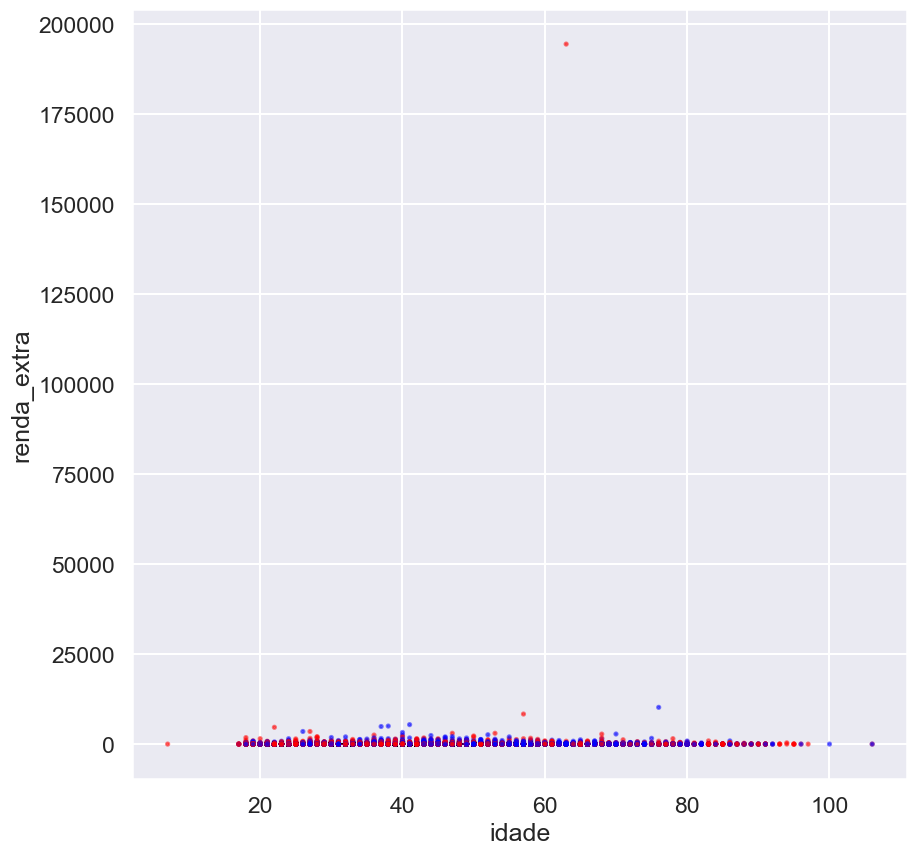

In [104]:
# Matriz de Dispersão:
att1 = 'idade'
att2 = 'renda_extra'

colors = ['red' if x else 'blue' for x in df['inadimplente']]

graph = df.plot.scatter(
    att1,
    att2,
    c = colors,
    s = 5,
    alpha = 0.5,
    figsize = (10, 10)
)

Retiramos o Outlier e continuamos com um novo dataset

In [105]:
df_tratado = df[df.renda_extra != df.renda_extra.max()]

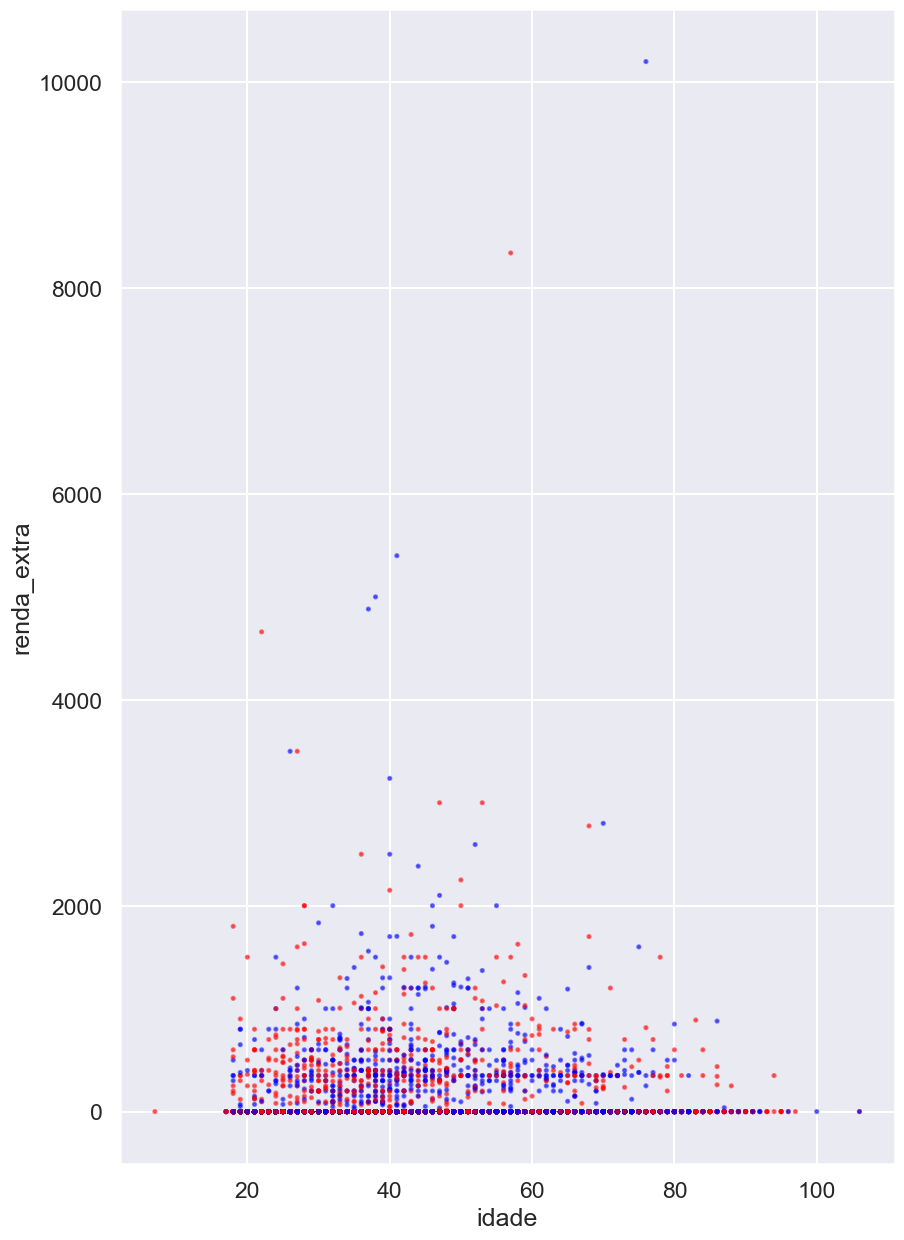

In [108]:
# Matriz de Dispersão:
att1 = 'idade'
att2 = 'renda_extra'

colors = ['red' if x else 'blue' for x in df_tratado['inadimplente']]

graph = df_tratado.plot.scatter(
    att1,
    att2,
    c = colors,
    s = 5,
    alpha = 0.5,
    figsize = (10, 15)
)

# 5. Classificação:

## 5.1. Treinamento:

Vamos separar a coluna de resultados e o conjunto de treinamento.

In [112]:
y = df_tratado.loc[:, 'inadimplente']
X = df_tratado.loc[:, [col for col in df_tratado.columns if col != 'inadimplente']]

Separando o conjunto te treinamento e o de teste, temos:

In [ ]:
'''
# Não será usado, já que todo o dataset será usado para treino, como outro dataset será usado para teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2, random_state=42)
'''

Dado que é um problema clássico de Classificação, escolhemos o modelo Random Forest Classifier, haja vista que, apesar de sua maior robustez frente a outros modelos, como o Decision Tree, ele tende a retornar resultados muito melhores.

In [221]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(
    n_estimators=200,
    random_state=0,
    max_depth=15,
    min_samples_leaf=5,
    min_samples_split=0.001,
    max_features=10,
    criterion='gini'
)

In [ ]:
# modelo.fit(X_treino, y_treino)
modelo.fit(X, y)

RandomForestClassifier(max_depth=15, max_features=10, min_samples_leaf=5,
                       min_samples_split=0.001, n_estimators=200,
                       random_state=0)

Por fim, vamos imprimir uma árvore para visualizar sua configuração após o treinamento:

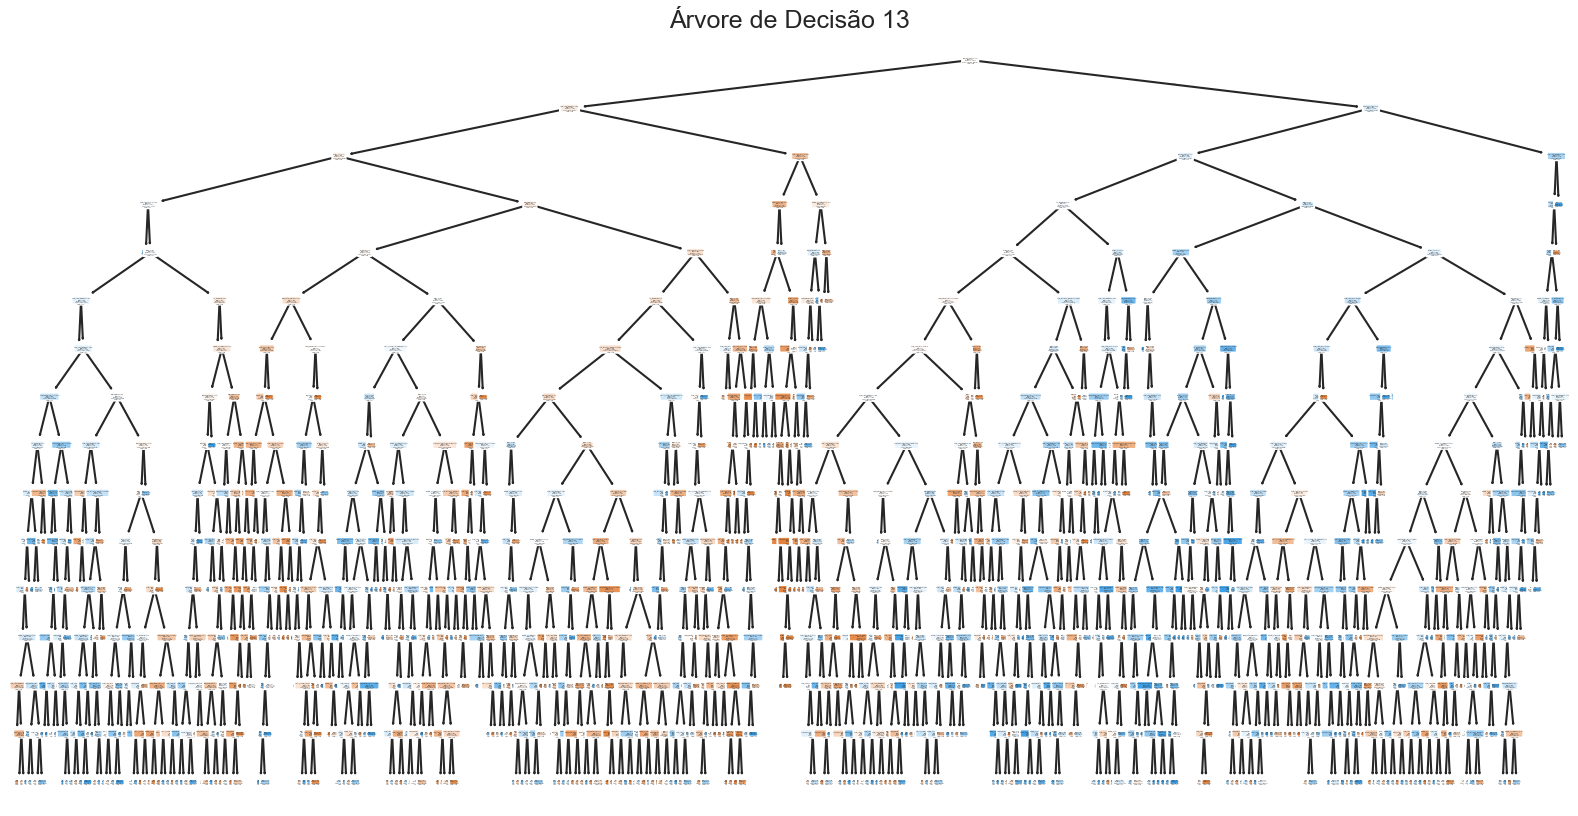

In [223]:
from sklearn.tree import plot_tree


tree_index = 13
tree = modelo.estimators_[tree_index]

plt.figure(figsize=(20,10))
plot_tree(
    tree,
    feature_names=df_tratado.columns[:-1],
    class_names=True,
    filled=True,
    rounded=True,
)

plt.title(f"Árvore de Decisão {tree_index}")
plt.show()

## 5.2. Teste:

In [224]:
resultados = modelo.predict(df_teste)

In [ ]:
# accuracy = accuracy_score(y_teste, resultados)
# precision = precision_score(y_teste, resultados, average='weighted')
# recall= recall_score(y_teste, resultados, average='weighted')
# f1= f1_score(y_teste,resultados, average='weighted')

# print(f'precisão - {precision}\nacurácia - {accuracy}\nrecall - {recall}\nf1 - {f1}')

In [225]:
len(resultados)

5000

In [226]:
df_teste_original = pd.read_csv('conjunto_de_teste.csv')

dict_res = {"inadimplente": resultados, "id_solicitante": df_teste_original["id_solicitante"]}
df_resultados = pd.DataFrame(dict_res)

df_resultados.head()

,inadimplente,id_solicitante
0,1,20001
1,1,20002
2,1,20003
3,0,20004
4,0,20005


In [227]:
df_resultados.to_csv('resultados.csv', index=False)

In [228]:
# Testando a leitura do csv:
df_resultados = pd.read_csv('resultados.csv')
df_resultados

,inadimplente,id_solicitante
0,1,20001
1,1,20002
2,1,20003
3,0,20004
4,0,20005
...,...,...
4995,0,24996
4996,1,24997
4997,1,24998
4998,1,24999
